## Warm-up task with a single input variable and incremental learning ##

Authors: Laura Nilsson & Leo Svanemar
Date: 2023-05-22



In [234]:
import pylab as pb
import numpy as np
import matplotlib . pyplot as plt
from math import pi
from scipy.stats import multivariate_normal
from scipy.spatial.distance import cdist

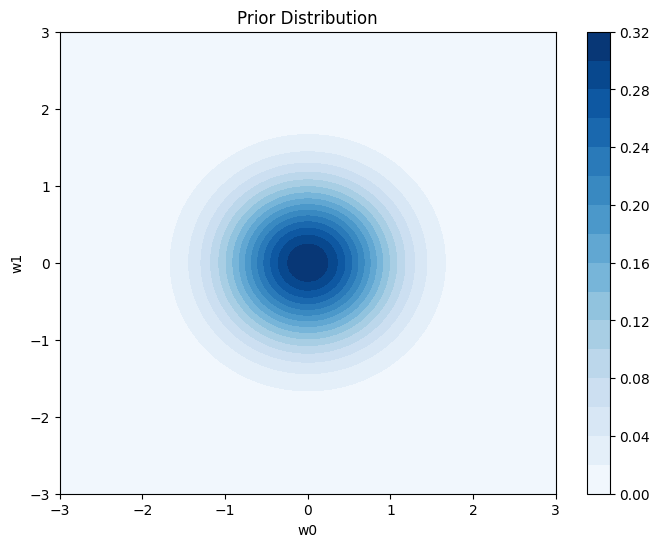

In [235]:
# Define the parameters
alpha = 2
sigma = 0.8
beta = 1 / sigma
mu = np.zeros(2)  # Mean vector
cov = (1/alpha) * np.eye(2)  # Covariance matrix

# Create a grid of w0 and w1 values
w0_vals = np.linspace(-3, 3, 100)
w1_vals = np.linspace(-3, 3, 100)
w0, w1 = np.meshgrid(w0_vals, w1_vals)
w_grid = np.stack((w0, w1), axis=2)

# Calculate the prior probability density for each combination of w0 and w1
prior = np.exp(-0.5 * np.sum((w_grid - mu) @ np.linalg.inv(cov) * (w_grid - mu), axis=2))
prior /= np.sqrt(np.linalg.det(2 * np.pi * cov))

# Create a contour plot of the prior distribution
plt.figure(figsize=(8, 6))
plt.contourf(w0, w1, prior, levels=20, cmap='Blues')
plt.colorbar()
plt.xlabel('w0')
plt.ylabel('w1')
plt.title('Prior Distribution')
plt.show()

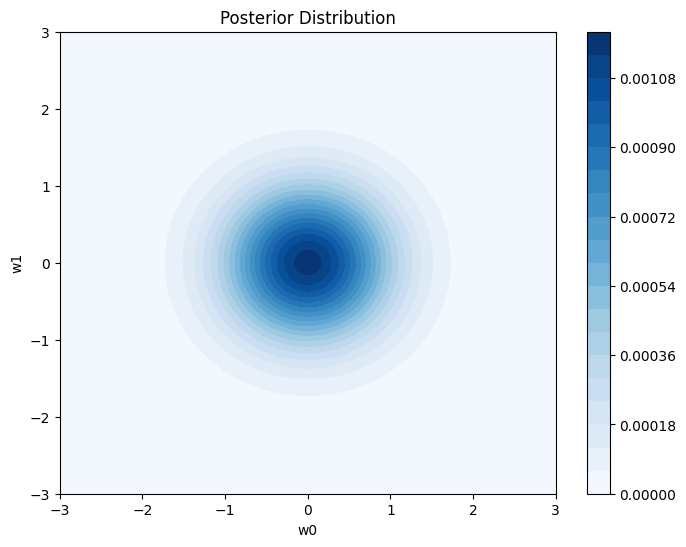

In [236]:
# Generate the data
x = np.linspace(-1, 1, 201)
t = -1.5 + 0.5 * x + np.random.normal(0, np.sqrt(0.2), len(x))

# Select a single data point
x_i = x[100]
t_i = t[100]

# Likelihood calculation
likelihood = np.exp(-0.5 * ((t_i - (mu[0] + mu[1] * x_i)) ** 2) / 0.2)

# Calculate the posterior distribution
posterior = likelihood * prior  # Ignoring the normalizing constant

# Normalize the posterior (for visualization purposes)
posterior /= np.sum(posterior)

# Create a contour plot of the posterior distribution
plt.figure(figsize=(8, 6))
plt.contourf(w0, w1, posterior, levels=20, cmap='Blues')
plt.colorbar()
plt.xlabel('w0')
plt.ylabel('w1')
plt.title('Posterior Distribution')
plt.show()

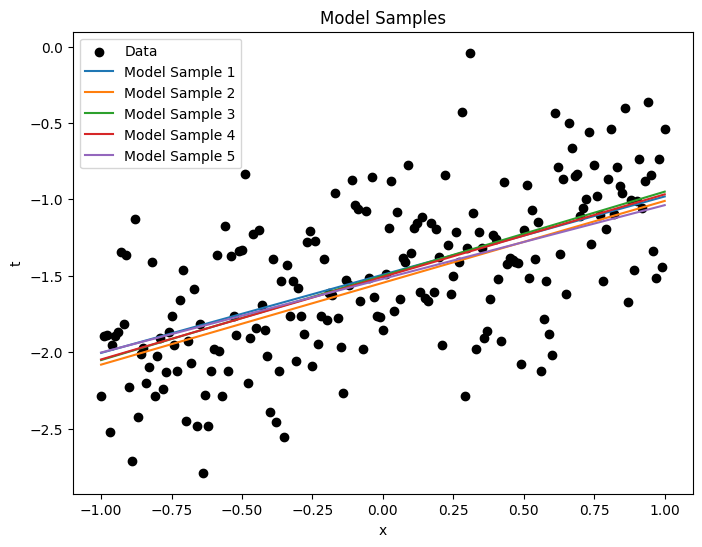

In [237]:
X_ext = np.vstack((np.ones_like(x), x)).T
t_data = t[:len(x)]

# Calculate the batch mean and covariance matrix
S_n_inv = alpha * np.eye(2) + beta * X_ext.T @ X_ext
S_n = np.linalg.inv(S_n_inv)
m_n = beta * S_n @ X_ext.T @ t_data

# Draw model samples from the multivariate normal distribution
num_samples = 5
model_samples = np.random.multivariate_normal(m_n, S_n, size=num_samples)

# Plot the resulting models
plt.figure(figsize=(8, 6))
plt.scatter(x, t, color='black', label='Data')
for i in range(num_samples):
    w0_sample, w1_sample = model_samples[i]
    y_pred = w0_sample + w1_sample * x
    plt.plot(x, y_pred, label=f'Model Sample {i+1}')
plt.xlabel('x')
plt.ylabel('t')
plt.title('Model Samples')
plt.legend()
plt.show()

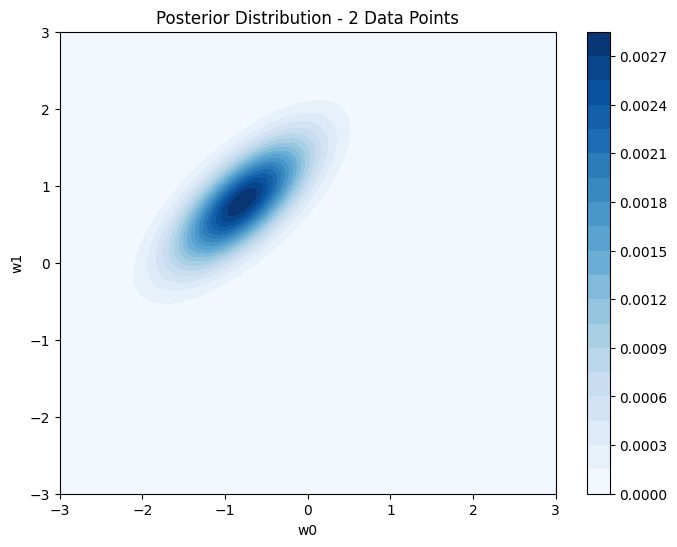

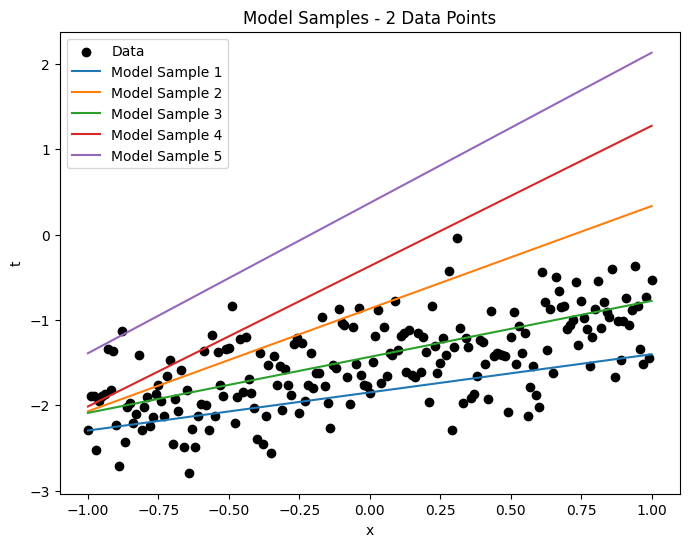

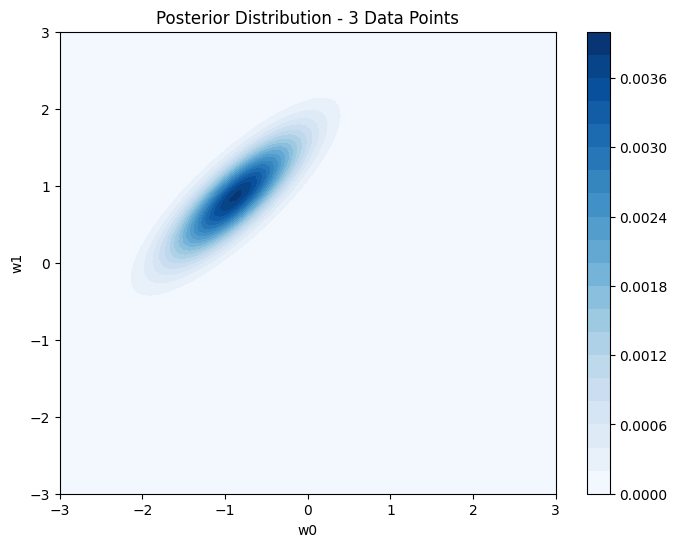

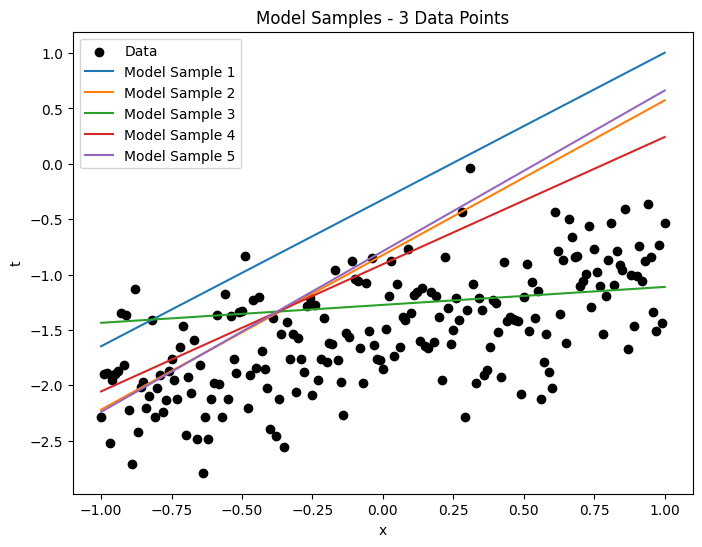

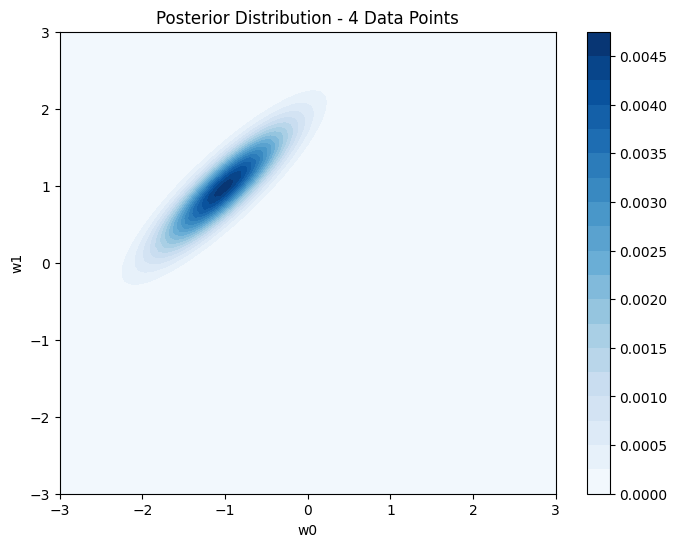

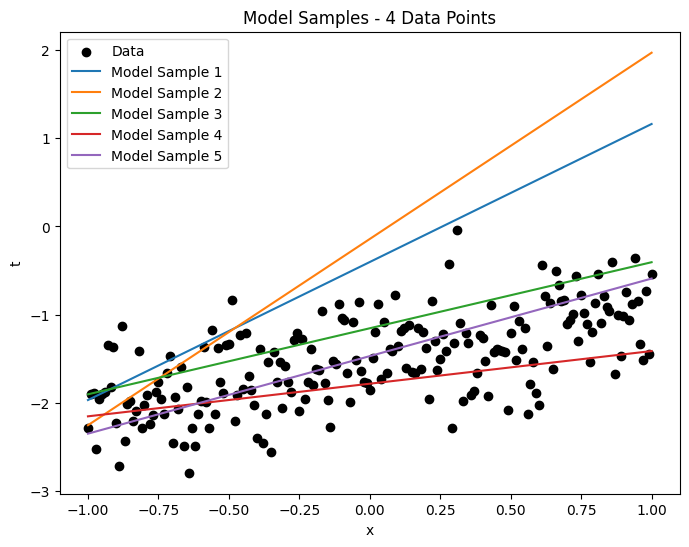

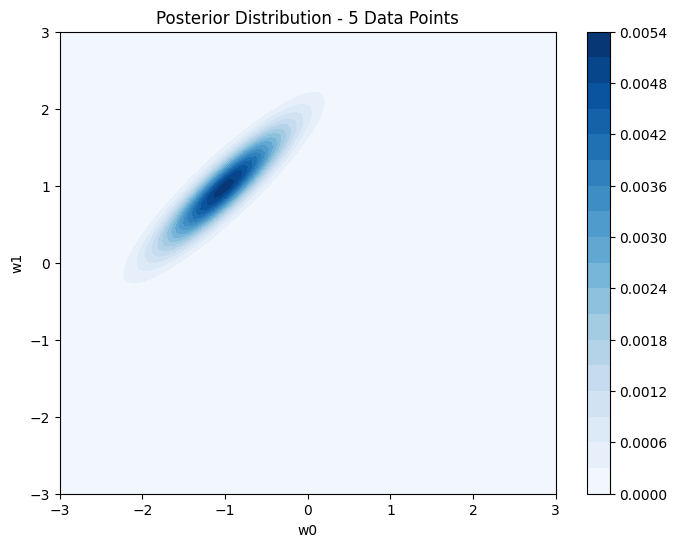

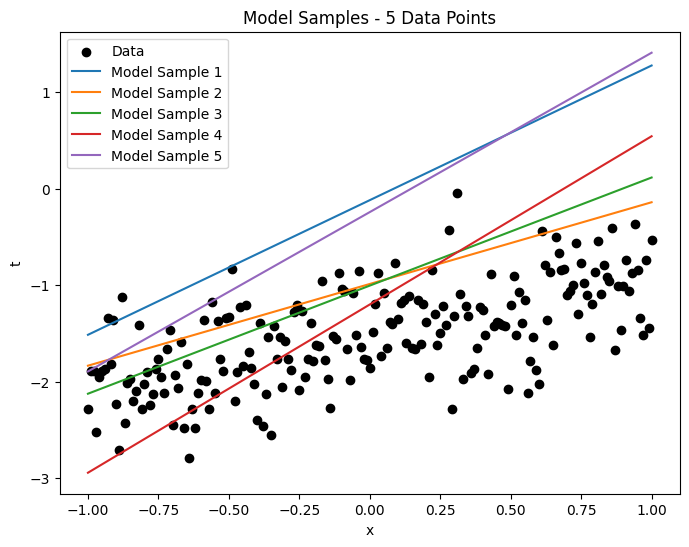

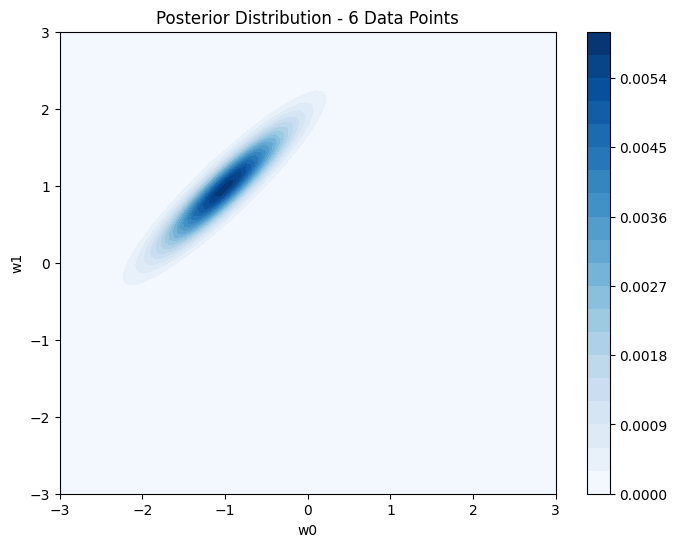

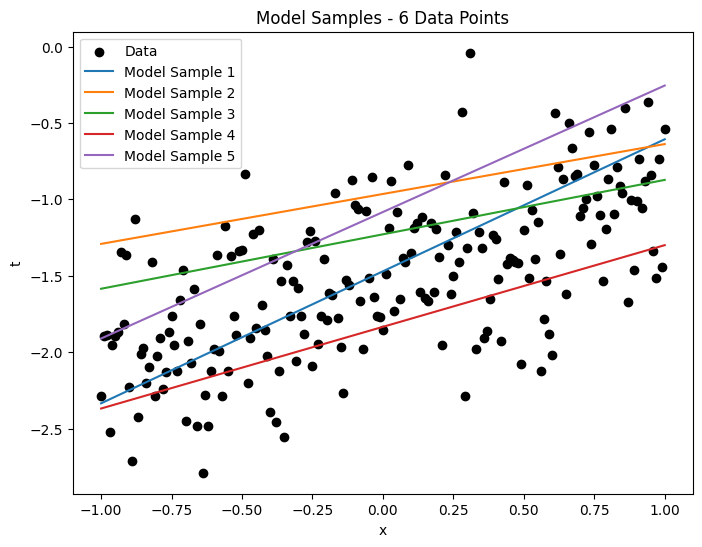

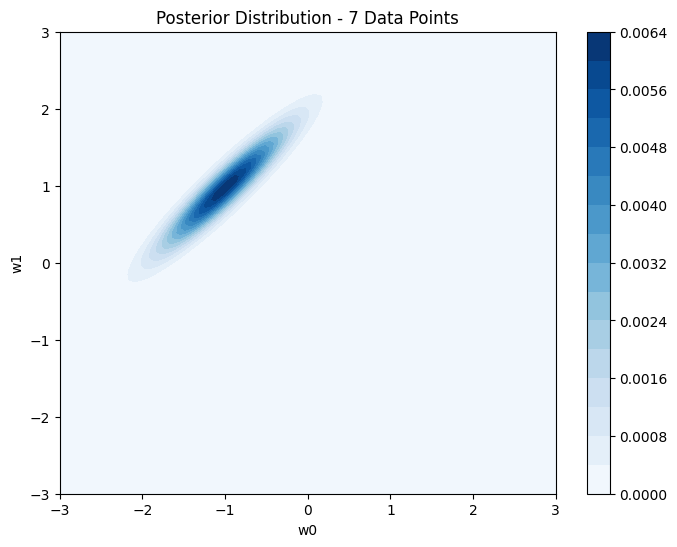

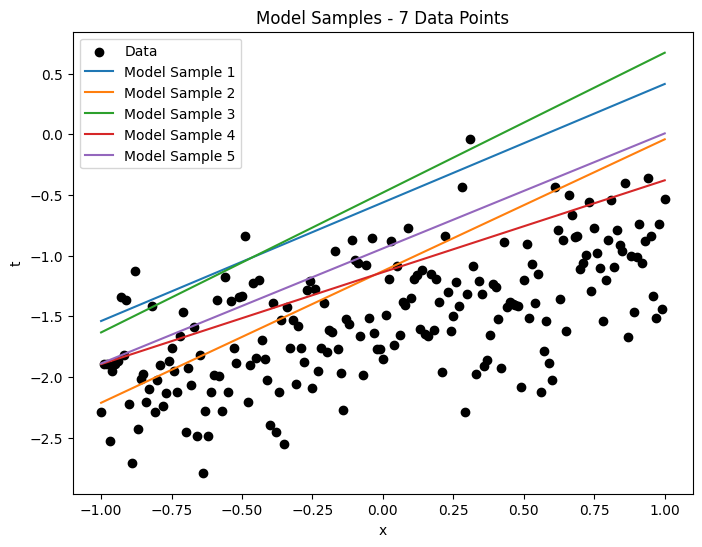

In [238]:
# Initialize the prior
prior = prior / np.sum(prior)  # Normalize the prior

# Loop for different number of data points
for num_data_points in range(2, 8):
    # Select data points
    x_data = x[:num_data_points]
    t_data = t[:num_data_points]

    # Select a single data point
    x_i = x_data[-1]
    t_i = t_data[-1]

    # Likelihood calculation
    likelihood = np.exp(-0.5 * ((t_i - (w0 + w1 * x_i)) ** 2) / 0.2)

    # Calculate the posterior distribution
    posterior = likelihood * prior  # Ignoring the normalizing constant

    # Normalize the posterior (for visualization purposes)
    posterior /= np.sum(posterior)

    # Create a contour plot of the posterior distribution
    plt.figure(figsize=(8, 6))
    plt.contourf(w0, w1, posterior, levels=20, cmap='Blues')
    plt.colorbar()
    plt.xlabel('w0')
    plt.ylabel('w1')
    plt.title(f'Posterior Distribution - {num_data_points} Data Points')
    plt.show()

    # Calculate the batch mean and covariance matrix
    X_ext = np.vstack((np.ones_like(x_data), x_data)).T
    S_n_inv = alpha * np.eye(2) + beta * X_ext.T @ X_ext
    S_n = np.linalg.inv(S_n_inv)
    m_n = beta * S_n @ X_ext.T @ t_data

    # Draw model samples from the multivariate normal distribution
    num_samples = 5
    model_samples = np.random.multivariate_normal(m_n, S_n, size=num_samples)

    # Plot the resulting models
    plt.figure(figsize=(8, 6))
    plt.scatter(x, t, color='black', label='Data')
    for i in range(num_samples):
        w0_sample, w1_sample = model_samples[i]
        y_pred = w0_sample + w1_sample * x
        plt.plot(x, y_pred, label=f'Model Sample {i+1}')
    plt.xlabel('x')
    plt.ylabel('t')
    plt.title(f'Model Samples - {num_data_points} Data Points')
    plt.legend()
    plt.show()

    # Update the prior
    prior = posterior

The posterior distribution becomes more concentrated and localized around the values of w0 and w1. Uncertainty decreases regarding the parameter values. the linear models become less variable as they are better fitted to the plot of the data points and are more likely to express the true pattern. To summarize, more data points lead to a more accurate estimation of parameters and linear models become less prone to underfitting and overfitting. 

Low noise level = narrower posterior distributions =  data points clustered closer to true relationship between x and t. Increasing noise level leads to increasingly spread out datapoints. 